In [1]:
#Set up the Matrix for the Dessert Tortoise Population
#
#Follow the prompts to enter the correct vital rate values
#############################################################################################
install.packages('popbio')
library(popbio)

F5 <- as.numeric(readline(prompt = "Enter subadult fecundity (F5): "))
F6 <- as.numeric(readline(prompt = "Enter adult1 fecundity (F6): "))
F7 <- as.numeric(readline(prompt = "Enter adult2 fecundity (F7): "))
P1 <- as.numeric(readline(prompt = "Enter yearling survival (P1): "))
P2 <- as.numeric(readline(prompt = "Enter juvenile 1 survival (P2): "))
P3 <- as.numeric(readline(prompt = "Enter juvenile 2 survival (P3): "))
P4 <- as.numeric(readline(prompt = "Enter immature 1 survival (P4): "))
P5 <- as.numeric(readline(prompt = "Enter immature 2 survival (P5): "))
P6 <- as.numeric(readline(prompt = "Enter subadult survival (P6): "))
P7 <- as.numeric(readline(prompt = "Enter adult 1 survival (P7): "))
P8 <- as.numeric(readline(prompt = "Enter adult 2 survival (P8): "))
G1 <- as.numeric(readline(prompt = "Enter probability of yearling growing to juvenile (G1): "))
G2 <- as.numeric(readline(prompt = "Enter probability of juvenile 1 growing to juvenile 2 (G2): "))
G3 <- as.numeric(readline(prompt = "Enter probability of juvenile 2 growing to immature 1 (G3): "))
G4 <- as.numeric(readline(prompt = "Enter probability of immature 1 growing to immature 2 (G4): "))
G5 <- as.numeric(readline(prompt = "Enter probability of immature 2 growing to subadult (G5): "))
G6 <- as.numeric(readline(prompt = "Enter probability of subadult growing to adult 1 (G6): "))
G7 <- as.numeric(readline(prompt = "Enter probability of adult 1 growing to adult 2 (G7): "))

ages <- c("yearling","juv1","juv2","imm1","imm2","subadult","adult1","adult2")

Tmat <- matrix(c(
  P1,0,0,0,0,F5,F6,F7,
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))

print("")
print("Make sure the matrix is correct before moving to the next steps!")
print("tortoise matrix")
print(Tmat)


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Enter subadult fecundity (F5):  1.3
Enter adult1 fecundity (F6):  1.98
Enter adult2 fecundity (F7):  2.57
Enter yearling survival (P1):  0
Enter juvenile 1 survival (P2):  0.567
Enter juvenile 2 survival (P3):  0.567
Enter immature 1 survival (P4):  0.604
Enter immature 2 survival (P5):  0.560
Enter subadult survival (P6):  0.678
Enter adult 1 survival (P7):  0.851
Enter adult 2 survival (P8):  0.860
Enter probability of yearling growing to juvenile (G1):  0.716
Enter probability of juvenile 1 growing to juvenile 2 (G2):  0.149
Enter probability of juvenile 2 growing to immature 1 (G3):  0.149
Enter probability of immature 1 growing to immature 2 (G4):  0.235
Enter probability of immature 2 growing to subadult (G5):  0.225
Enter probability of subadult growing to adult 1 (G6):  0.249
Enter probability of adult 1 growing to adult 2 (G7):  0.016


[1] ""
[1] "Make sure the matrix is correct before moving to the next steps!"
[1] "tortoise matrix"
         yearling  juv1  juv2  imm1  imm2 subadult adult1 adult2
yearling    0.000 0.000 0.000 0.000 0.000    1.300  1.980   2.57
juv1        0.716 0.567 0.000 0.000 0.000    0.000  0.000   0.00
juv2        0.000 0.149 0.567 0.000 0.000    0.000  0.000   0.00
imm1        0.000 0.000 0.149 0.604 0.000    0.000  0.000   0.00
imm2        0.000 0.000 0.000 0.235 0.560    0.000  0.000   0.00
subadult    0.000 0.000 0.000 0.000 0.225    0.678  0.000   0.00
adult1      0.000 0.000 0.000 0.000 0.000    0.249  0.851   0.00
adult2      0.000 0.000 0.000 0.000 0.000    0.000  0.016   0.86


[1] "The stable stage distribution"
  yearling       juv1       juv2       imm1       imm2   subadult     adult1 
0.22166176 0.40584602 0.15463402 0.06507519 0.03841808 0.03086514 0.07178651 
    adult2 
0.01171327 


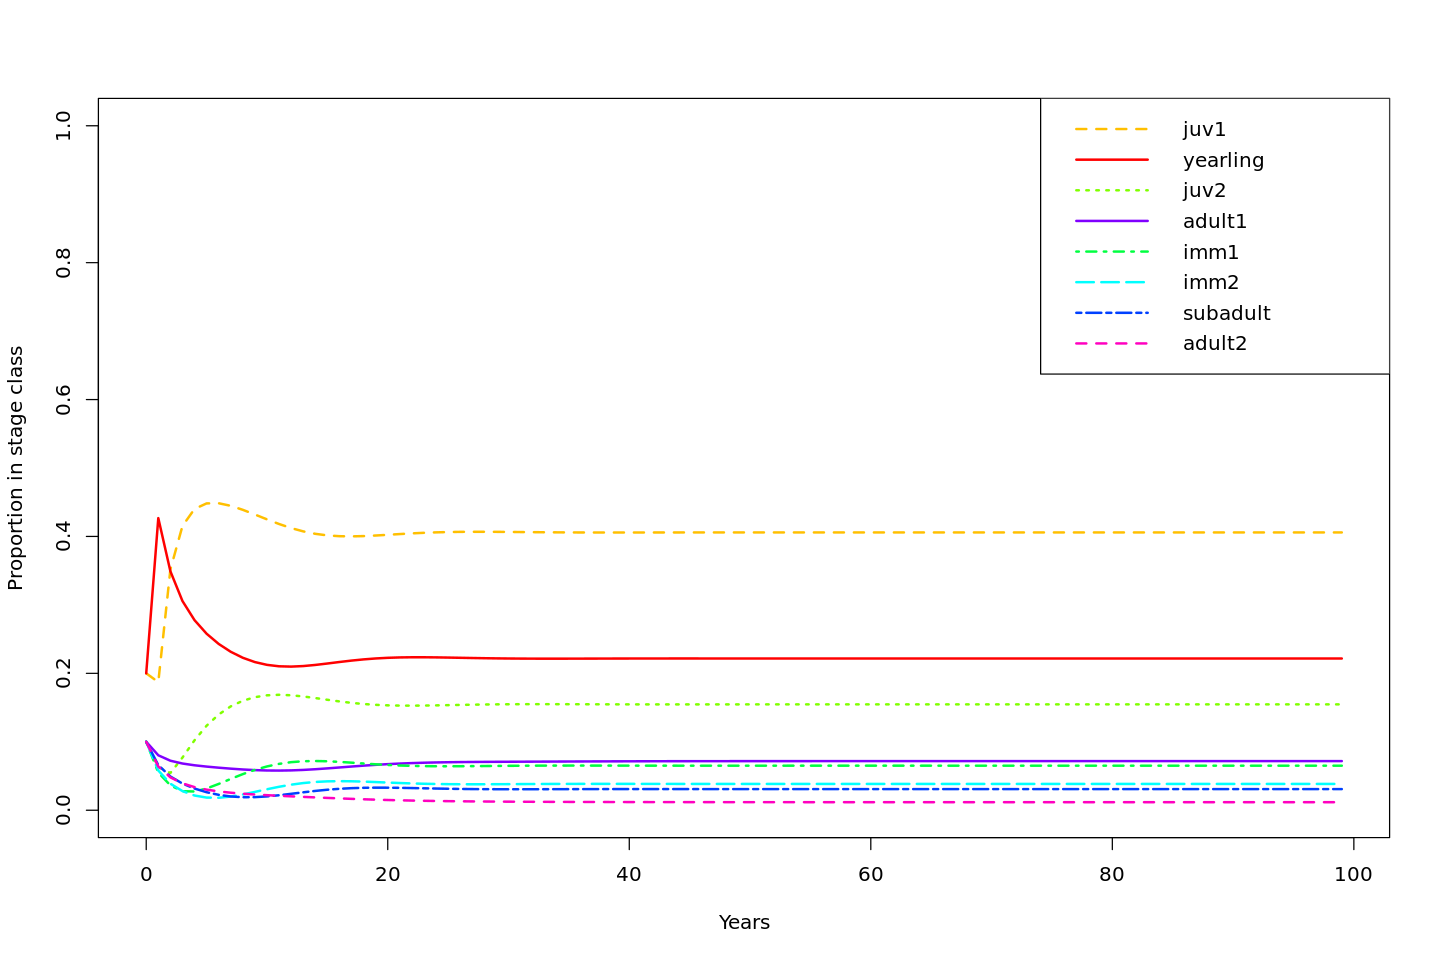

In [2]:
###Project forward 100 steps to get the stable stage distribution
####################################################################
library(popbio)
#starting population
Tstart <- c(200,200,100,100,100,100,100,100)
#make projections
projA <- pop.projection(Tmat, Tstart, 100)

#plot the stable stage distribution
options(repr.plot.width = 12, repr.plot.height = 8)
stage.vector.plot(projA$stage.vectors, ylim=c(0,1))

print("The stable stage distribution")
print(projA$stable.stage)

In [3]:
###What is the stable stage growth rate for this population?
##############################################################
lam <- data.frame(LAMBDA.ssd =projA$lambda)
print(lam)

  LAMBDA.ssd
1  0.9580592


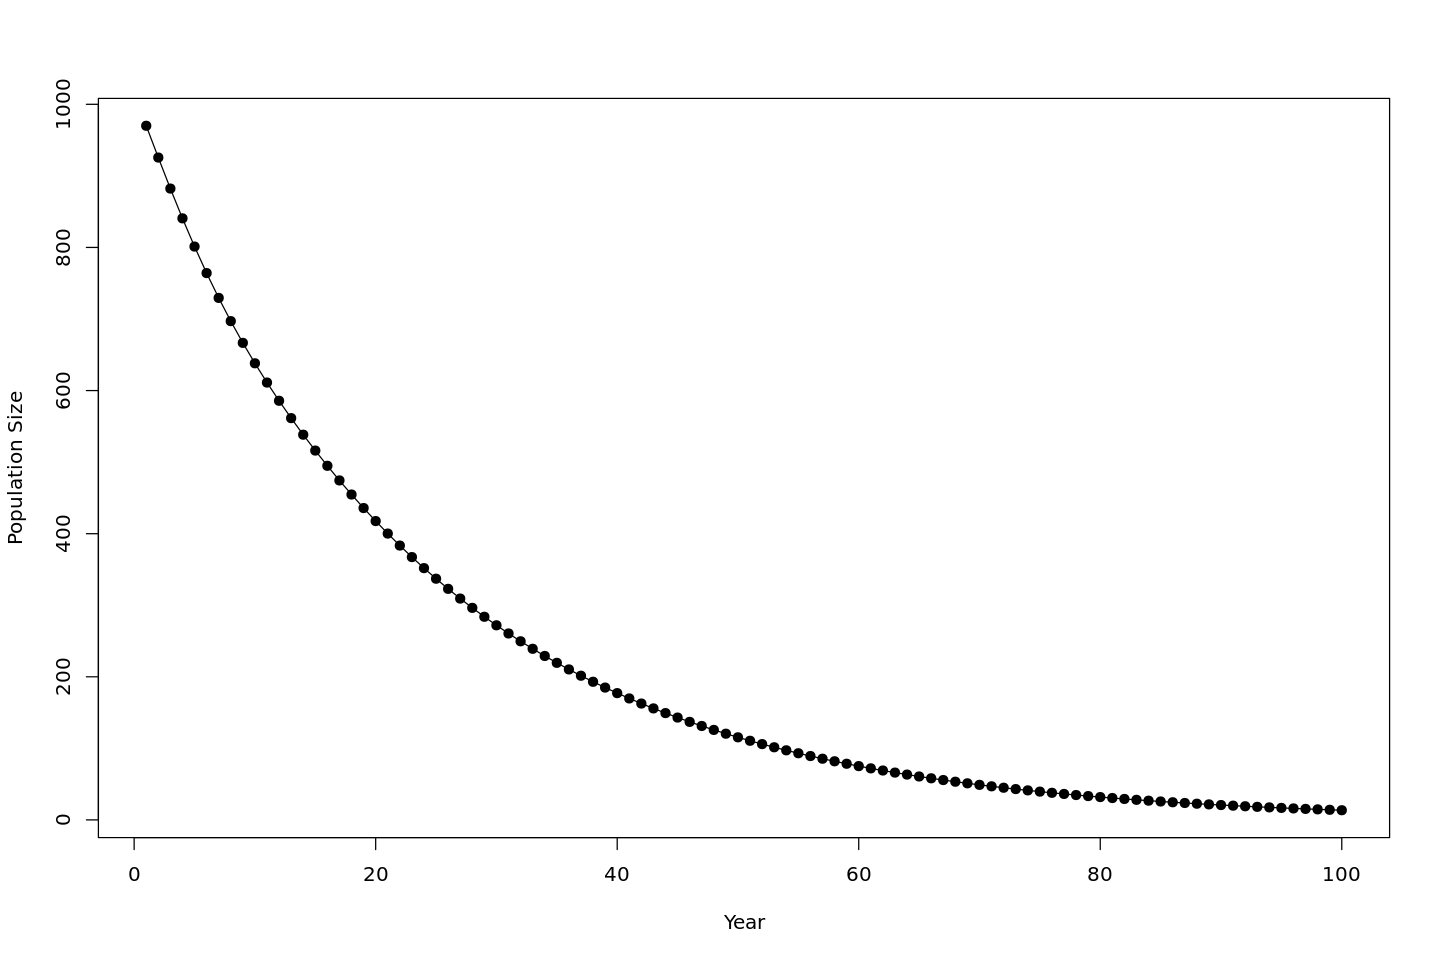

In [4]:
#### plot growth 100 years under current conditions with a starting population of 1000 tortoises
################################################################################################
library(popbio)
Tssd <-c(220,400,150,60,30,30,70,10)
projA <- pop.projection(Tmat, Tssd, 100)
plot(projA$pop.sizes, pch=19, ylab="Population Size", xlab = "Year")
lines(projA$pop.sizes)

[1] "Elasticity Values"
           yearling       juv1       juv2       imm1       imm2    subadult
yearling 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.008187644
juv1     0.04333417 0.06283057 0.00000000 0.00000000 0.00000000 0.000000000
juv2     0.00000000 0.04333417 0.06283057 0.00000000 0.00000000 0.000000000
imm1     0.00000000 0.00000000 0.04333417 0.07392503 0.00000000 0.000000000
imm2     0.00000000 0.00000000 0.00000000 0.04333417 0.06096363 0.000000000
subadult 0.00000000 0.00000000 0.00000000 0.00000000 0.04333417 0.104908414
adult1   0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.035146527
adult2   0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.000000000
              adult1      adult2
yearling 0.029003879 0.006142648
juv1     0.000000000 0.000000000
juv2     0.000000000 0.000000000
imm1     0.000000000 0.000000000
imm2     0.000000000 0.000000000
subadult 0.000000000 0.000000000
adult1   0.279375252 0.000000000
adult2   0.006142648 0.05387

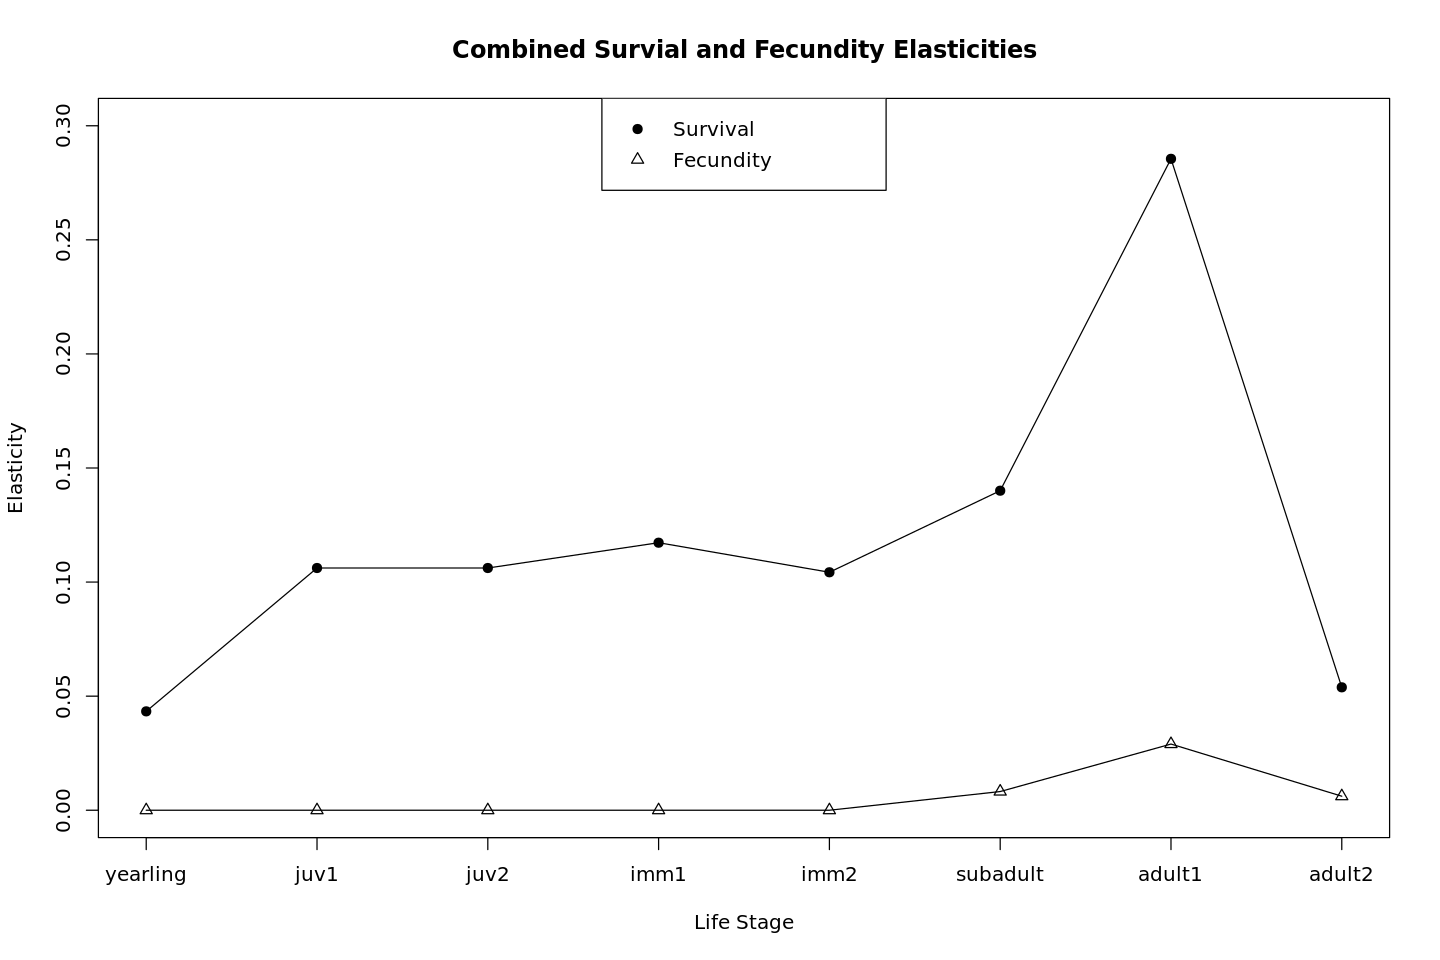

In [5]:
#Calculate elasticity and plot elasticity for survival and reproduction
######################################################################

library(popbio)
elas <- elasticity(Tmat)

Fec <- elas[1,]
Sur <- c(elas[1,1] + elas[2,1],
         elas[2,2] + elas[3,2],
         elas[3,3] + elas[4,3],
         elas[4,4] + elas[5,4],
         elas[5,5] + elas[6,5],
         elas[6,6] + elas[7,6],
         elas[7,7] + elas[8,7],
         elas[8,8])
e.dat <- data.frame(Stage = c("yearling","juv1","juv2","imm1","imm2","subadult","adult1","adult2"), 
                    STG = c(1,2,3,4,5,6,7,8),Fe = Fec, Se = Sur)

print("Elasticity Values")
print(elas)

#Plot by stage
options(repr.plot.width = 12, repr.plot.height = 8)
plot(Se~STG, data = e.dat, ylab="Elasticity", pch=19, ylim=c(0,0.3), xlab="Life Stage", xaxt = 'n', main="Combined Survial and Fecundity Elasticities")
lines(Se~STG, data = e.dat)
points(Fe~STG, data = e.dat, pch=2)
lines(Fe~STG, data = e.dat)
axis(side=1, at=seq(1:8), labels = c("yearling","juv1","juv2","imm1","imm2","subadult","adult1","adult2"))
legend("top", pch=c(19,2), legend=c("Survival","Fecundity"))

In [6]:
#How does increasing survival or fecundity by up to 5% change population growth?
#
#Get lambda values for increases in survival and fecundity
###############################################################################

library(popbio)

#increase survival 1%
S10 <- matrix(c(
  0,0,0,0,0,F5,F6,F7,
  G1 + (G1*0.01),P2 + (P2*0.01),0,0,0,0,0,0,
  0,G2 + (G2*0.01),P3 + (P3*0.01),0,0,0,0,0,
  0,0,G3 + (G3*0.01),P4 + (P4*0.01),0,0,0,0,
  0,0,0,G4 + (G4*0.01),P5 + (P5*0.01),0,0,0,
  0,0,0,0,G5 + (G5*0.01),P6 + (P6*0.01),0,0,
  0,0,0,0,0,G6 + (G6*0.01),P7+(P7*0.01),0,
  0,0,0,0,0,0,G7+(G7*0.01),P8 + (P8*0.01)
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase survival 2%
S20 <- matrix(c(
  0,0,0,0,0,F5,F6,F7,
  G1 + (G1*0.02),P2 + (P2*0.02),0,0,0,0,0,0,
  0,G2 + (G2*0.02),P3 + (P3*0.02),0,0,0,0,0,
  0,0,G3 + (G3*0.02),P4 + (P4*0.02),0,0,0,0,
  0,0,0,G4 + (G4*0.02),P5 + (P5*0.02),0,0,0,
  0,0,0,0,G5 + (G5*0.02),P6 + (P6*0.02),0,0,
  0,0,0,0,0,G6 + (G6*0.02),P7+(P7*0.02),0,
  0,0,0,0,0,0,G7+(G7*0.02),P8 + (P8*0.02)
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase survival 30%
S30 <- matrix(c(
  0,0,0,0,0,F5,F6,F7,
  G1 + (G1*0.03),P2 + (P2*0.03),0,0,0,0,0,0,
  0,G2 + (G2*0.03),P3 + (P3*0.03),0,0,0,0,0,
  0,0,G3 + (G3*0.03),P4 + (P4*0.03),0,0,0,0,
  0,0,0,G4 + (G4*0.03),P5 + (P5*0.03),0,0,0,
  0,0,0,0,G5 + (G5*0.03),P6 + (P6*0.03),0,0,
  0,0,0,0,0,G6 + (G6*0.03),P7+(P7*0.03),0,
  0,0,0,0,0,0,G7+(G7*0.03),P8 + (P8*0.03)
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase survival 40%
S40 <- matrix(c(
  0,0,0,0,0,F5,F6,F7,
  G1 + (G1*0.04),P2 + (P2*0.04),0,0,0,0,0,0,
  0,G2 + (G2*0.04),P3 + (P3*0.04),0,0,0,0,0,
  0,0,G3 + (G3*0.04),P4 + (P4*0.04),0,0,0,0,
  0,0,0,G4 + (G4*0.04),P5 + (P5*0.04),0,0,0,
  0,0,0,0,G5 + (G5*0.04),P6 + (P6*0.04),0,0,
  0,0,0,0,0,G6 + (G6*0.04),P7+(P7*0.04),0,
  0,0,0,0,0,0,G7+(G7*0.04),P8 + (P8*0.04)
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase survival 5%
S50 <- matrix(c(
  0,0,0,0,0,F5,F6,F7,
  G1 + (G1*0.05),P2 + (P2*0.05),0,0,0,0,0,0,
  0,G2 + (G2*0.05),P3 + (P3*0.05),0,0,0,0,0,
  0,0,G3 + (G3*0.05),P4 + (P4*0.05),0,0,0,0,
  0,0,0,G4 + (G4*0.05),P5 + (P5*0.05),0,0,0,
  0,0,0,0,G5 + (G5*0.05),P6 + (P6*0.05),0,0,
  0,0,0,0,0,G6 + (G6*0.05),P7+(P7*0.05),0,
  0,0,0,0,0,0,G7+(G7*0.05),P8 + (P8*0.05)
), nrow=8,byrow=T, dimnames = list(ages,ages))

projS10 <- pop.projection(S10, Tssd, 100)
projS20 <- pop.projection(S20, Tssd, 100)
projS30 <- pop.projection(S30, Tssd, 100)
projS40 <- pop.projection(S40, Tssd, 100)
projS50 <- pop.projection(S50, Tssd, 100)

Slam <- data.frame(Survival_Increase_Percent = c(0,1,2,3,4,5), 
                   LAMBDA.ssd =c(projA$lambda,projS10$lambda,projS20$lambda,projS30$lambda,projS40$lambda,projS50$lambda))
print(Slam)

#increase fecundity 1%
f10 <- matrix(c(
  P1,0,0,0,0,F5 + (F5*0.01),F6 + (F5*0.01),F7 + (F7*0.01),
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase fecundity 2%
f20 <- matrix(c(
  P1,0,0,0,0,F5 + (F5*0.02),F6 + (F5*0.02),F7 + (F7*0.02),
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase fecundity 3%
f30 <- matrix(c(
  P1,0,0,0,0,F5 + (F5*0.03),F6 + (F5*0.03),F7 + (F7*0.03),
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase fecundity 4%
f40 <- matrix(c(
  P1,0,0,0,0,F5 + (F5*0.04),F6 + (F5*0.04),F7 + (F7*0.04),
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))
#increase fecundity 5%
f50 <- matrix(c(
  P1,0,0,0,0,F5 + (F5*0.05),F6 + (F5*0.05),F7 + (F7*0.05),
  G1,P2,0,0,0,0,0,0,
  0,G2,P3,0,0,0,0,0,
  0,0,G3,P4,0,0,0,0,
  0,0,0,G4,P5,0,0,0,
  0,0,0,0,G5,P6,0,0,
  0,0,0,0,0,G6,P7,0,
  0,0,0,0,0,0,G7,P8
), nrow=8,byrow=T, dimnames = list(ages,ages))

projf10 <- pop.projection(f10, Tssd, 100)
projf20 <- pop.projection(f20, Tssd, 100)
projf30 <- pop.projection(f30, Tssd, 100)
projf40 <- pop.projection(f40, Tssd, 100)
projf50 <- pop.projection(f50, Tssd, 100)


Flam <- data.frame(Survival_Reproduction_Percent = c(0,1,2,3,4,5), 
                   LAMBDA.ssd =c(projA$lambda,projf10$lambda,projf20$lambda,projf30$lambda,projf40$lambda,projf50$lambda))

print(Flam)

  Survival_Increase_Percent LAMBDA.ssd
1                         0  0.9580592
2                         1  0.9672231
3                         2  0.9763841
4                         3  0.9855421
5                         4  0.9946972
6                         5  1.0038494
  Survival_Reproduction_Percent LAMBDA.ssd
1                             0  0.9580592
2                             1  0.9583781
3                             2  0.9586952
4                             3  0.9590105
5                             4  0.9593242
6                             5  0.9596362


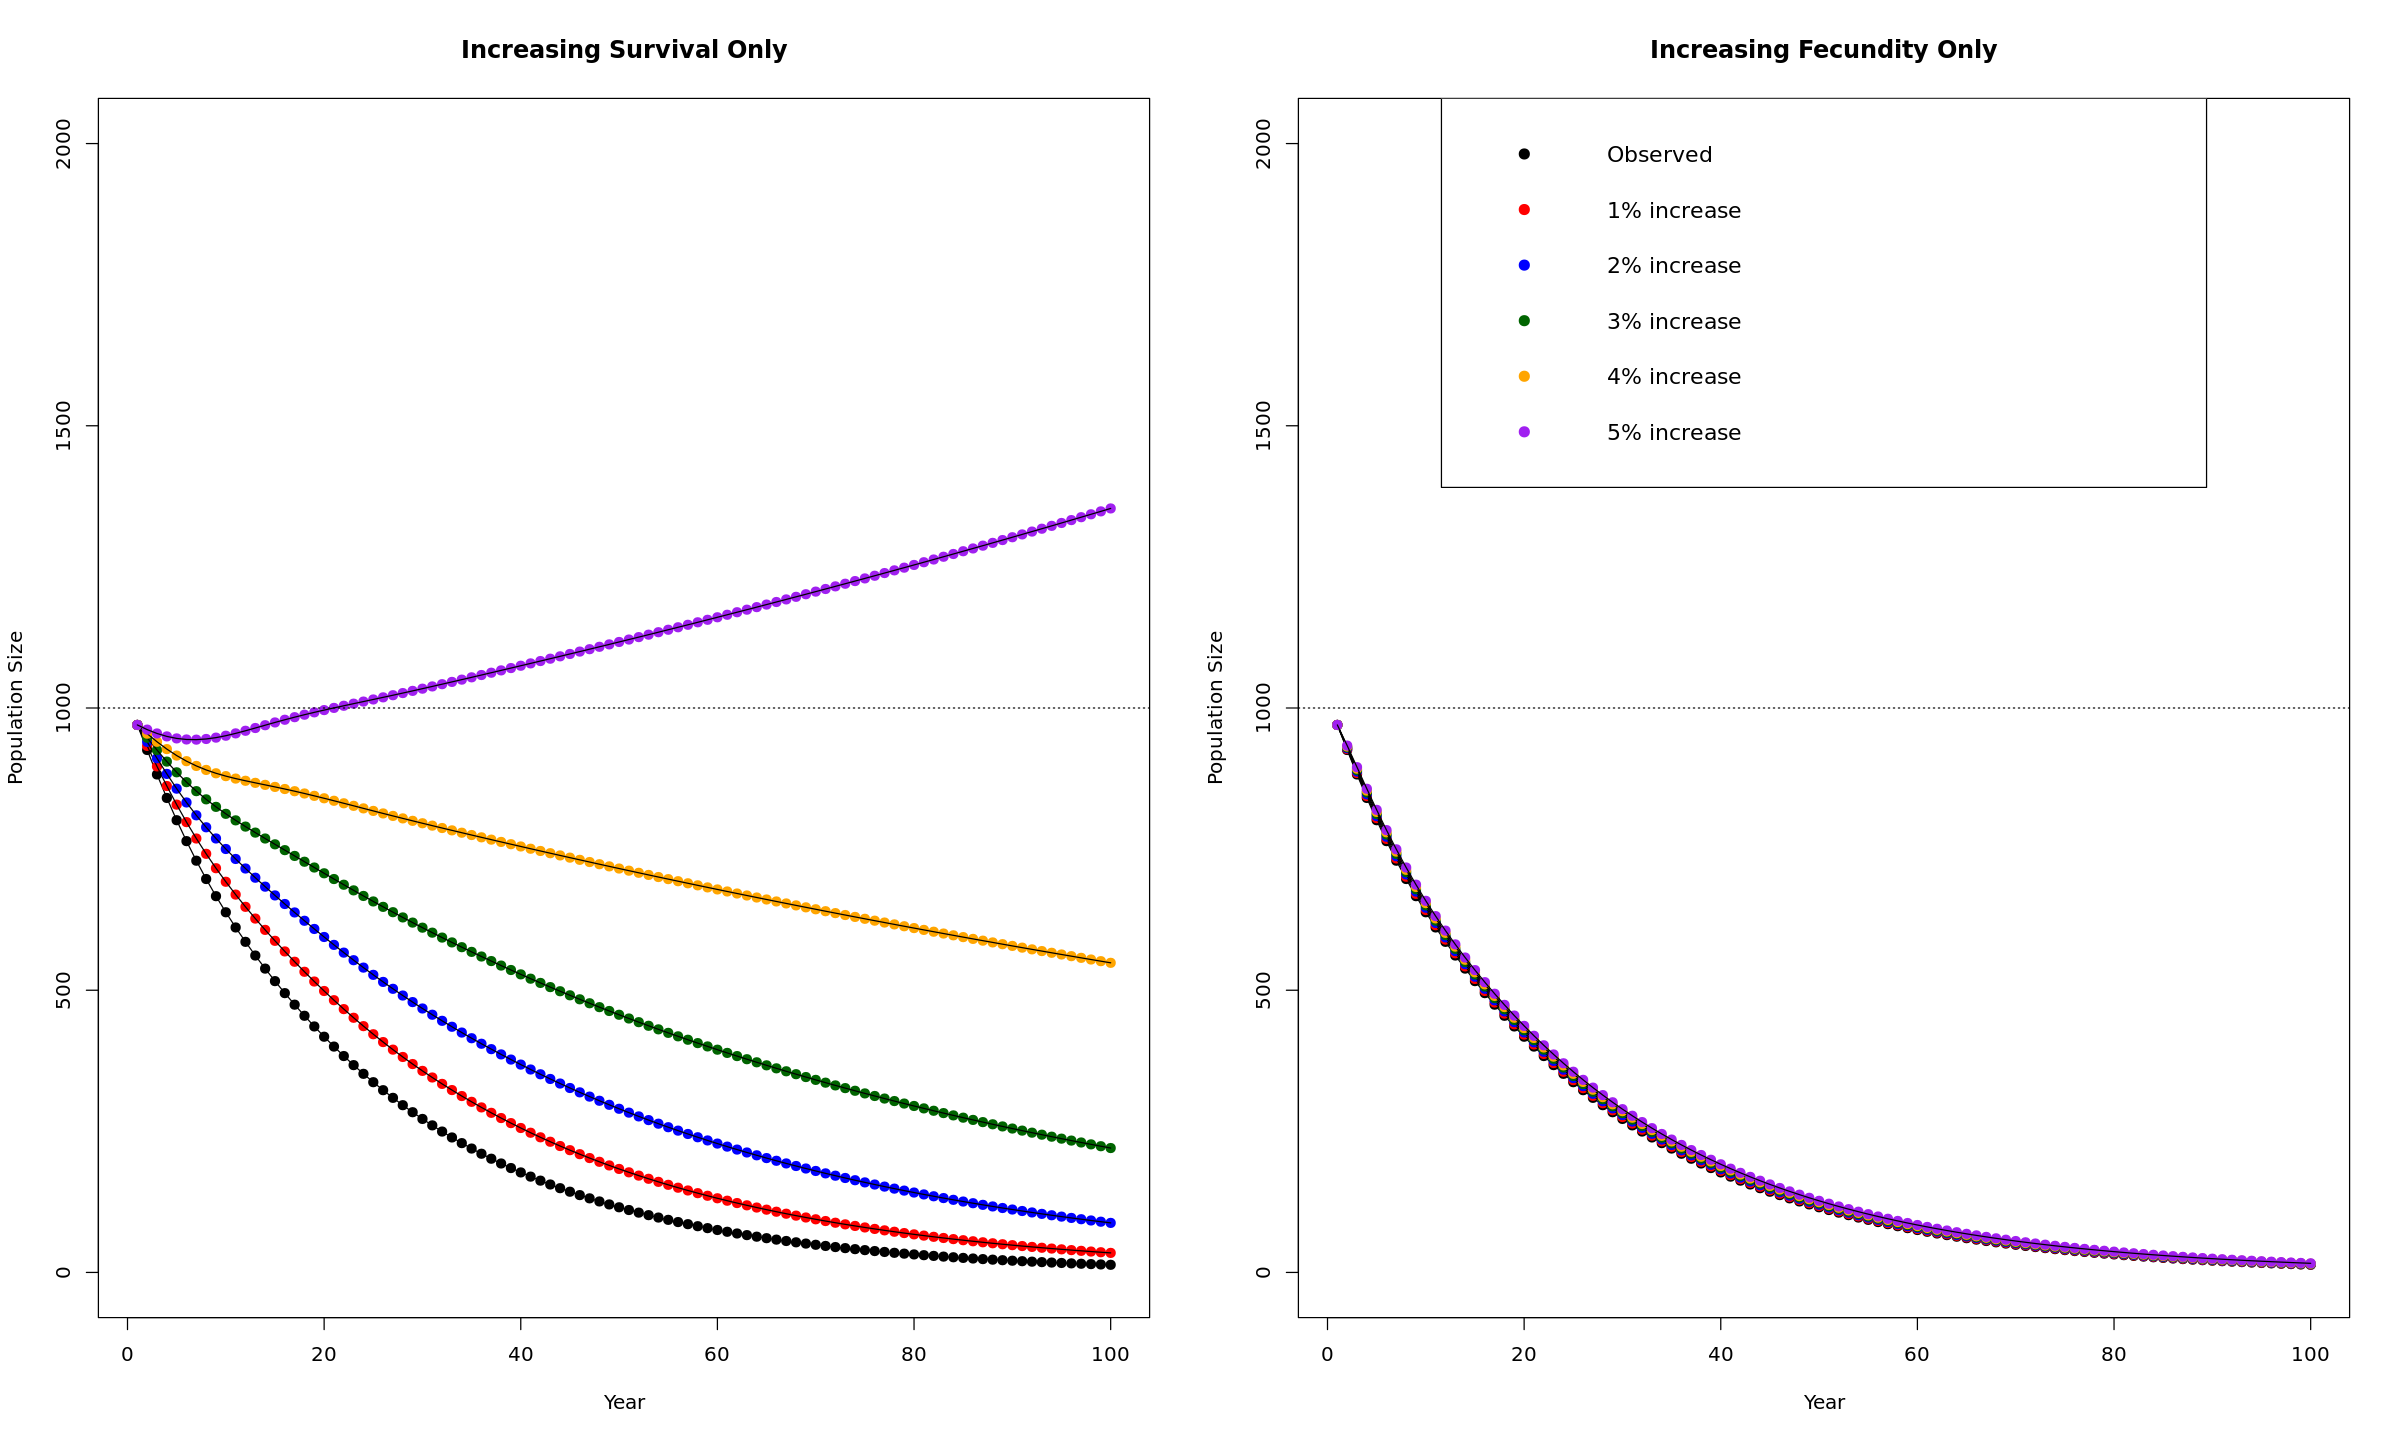

In [12]:
#Plot population change increasing survival or fecundity by up to 5% 
###############################################################################

options(repr.plot.width = 20, repr.plot.height = 12)
par(mfrow=c(1,2))
#survival
plot(projA$pop.sizes, pch=19, ylab="Population Size", xlab = "Year", col="black",
     ylim=c(0,2000), main = "Increasing Survival Only")
lines(projA$pop.sizes)
points(projS10$pop.sizes, pch=19, col="red")
lines(projS10$pop.sizes)
points(projS20$pop.sizes, pch=19, col="blue")
lines(projS20$pop.sizes)
points(projS30$pop.sizes, pch=19, col="darkgreen")
lines(projS30$pop.sizes)
points(projS40$pop.sizes, pch=19, col="orange")
lines(projS40$pop.sizes)
points(projS50$pop.sizes, pch=19, col="purple")
lines(projS50$pop.sizes)
abline(h=1000, lty="dotted")
#Reproduction
plot(projA$pop.sizes, pch=19, ylab="Population Size", xlab = "Year", col="black",
     ylim=c(0,2000), main = "Increasing Fecundity Only")
lines(projA$pop.sizes)
points(projf10$pop.sizes, pch=19, col="red")
lines(projf10$pop.sizes)
points(projf20$pop.sizes, pch=19, col="blue")
lines(projf20$pop.sizes)
points(projf30$pop.sizes, pch=19, col="darkgreen")
lines(projf30$pop.sizes)
points(projf40$pop.sizes, pch=19, col="orange")
lines(projf40$pop.sizes)
points(projf50$pop.sizes, pch=19, col="purple")
lines(projf50$pop.sizes)
abline(h=1000, lty="dotted")
legend("top", pch=c(19,19,19,19,19,19), col=c("black","red","blue","darkgreen","orange","purple"),
       legend=c("Observed","1% increase","2% increase","3% increase","4% increase","5% increase"), cex=1.1)

In [18]:
##############################################################################
# Lionfish
#
#Follow the prompts to enter the correct vital rate values
##############################################################################
library(popbio)

LF3 <- as.numeric(readline(prompt = "Enter lionfish adult fecundity (F3): "))
LP1 <- as.numeric(readline(prompt = "Enter larval lionfish survival (P1): "))
LP2 <- as.numeric(readline(prompt = "Enter juvenile lionfish survival (P2): "))
LP3 <- as.numeric(readline(prompt = "Enter adult lionfish survival (P3): "))
LG1 <- as.numeric(readline(prompt = "Enter probability of larvae growing to juvenile (G1): "))
LG2 <- as.numeric(readline(prompt = "Enter probability of juvenile growing to adult (G2): "))

Lages <- c("larvae","juvenile","adult")

Lmat <- matrix(c(
  LP1,0,LF3,
  LG1,LP2 ,0,
  0,LG2,LP3
), nrow=3,byrow=T, dimnames = list(Lages,Lages))

print("")
print("Make sure the matrix is correct before moving to the next steps!")
print("lionfish matrix")
print(Lmat)

Enter lionfish adult fecundity (F3):  35315
Enter larval lionfish survival (P1):  0
Enter juvenile lionfish survival (P2):  0.77
Enter adult lionfish survival (P3):  0.949
Enter probability of larvae growing to juvenile (G1):  0.00003
Enter probability of juvenile growing to adult (G2):  0.071


[1] ""
[1] "Make sure the matrix is correct before moving to the next steps!"
[1] "lionfish matrix"
         larvae juvenile     adult
larvae    0e+00    0.000 35315.000
juvenile  3e-05    0.770     0.000
adult     0e+00    0.071     0.949


In [22]:
########################################################
#
# Get Lionfish population monthly growth rate
##################################################
library(popbio)
#starting population
Lstart <- c(10,10,10)
#make projections
projL <- pop.projection(Lmat, Lstart, 100)

lamLF <- data.frame(LAMBDA.ssd =projL$lambda)

print("Lionfish Monthly Population Growth Rate")
print(lamLF)

[1] "Lionfish Monthly Population Growth Rate"
  LAMBDA.ssd
1   1.132337


In [38]:
############################################################################################
#
#What is the minimum percentage of the juvenile and adult lionfish population 
#that needs to be removed each month cause the population to decline? 
#
#Try different harvest percentages until you find the minimum to cause population decline
############################################################################################
library(popbio)

PC <- as.numeric(readline(prompt = "Enter a harvest % value: "))
PC1 <- PC/100


Lmat1 <- matrix(c(
  LP1,0,LF3,
  LG1,LP2 - (LP2 * PC1) ,0,
  0,LG2 - (LG2 * PC1),LP3 - (LP3 * PC1)
), nrow=3,byrow=T, dimnames = list(Lages,Lages))

#starting population
Lstart <- c(10,10,10)
#make projections
projL1 <- pop.projection(Lmat1, Lstart, 100)

lamLF <- data.frame(LAMBDA.ssd =projL1$lambda)

print(paste("Population growth rate with ",PC,"% of the total juvenile and adult population harvested each month"))
print(lamLF)

Enter a harvest % value:  18


[1] "Population growth rate with  18 % of the total juvenile and adult population harvested each month"
  LAMBDA.ssd
1  0.9677074
